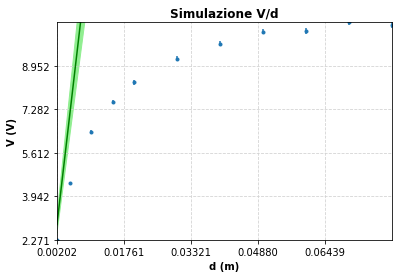

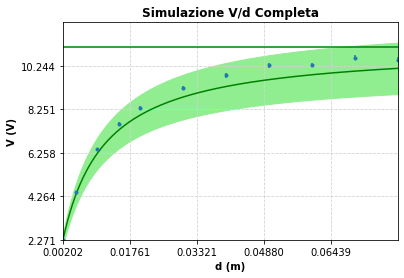

Q fittato ed errore
3.384591436676446e-10
1.8366005423010108e-12
eps0 fittato ed errore
9.408339772301264e-12
2.1433843718198645e-13
eps aria
8.86e-12


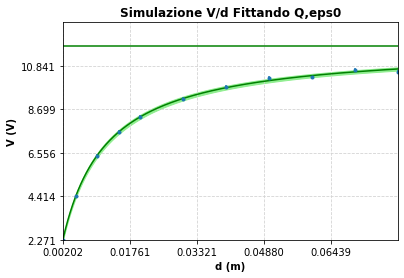

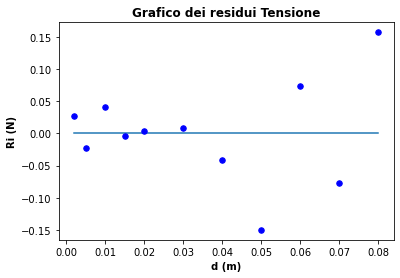

sigma_post_fit
0.08378779280732387
chiquadro
7.653084653093128
chiquadroridotto
0.8503427392325698
sigma_PF_Pesata
[0.0210248  0.0407586  0.05938584 0.06999045 0.07681429 0.08520576
 0.09009311 0.0933206  0.09562595 0.0972858  0.0985768 ]
Verr
[0.0228 0.0442 0.0644 0.0759 0.0833 0.0924 0.0977 0.1012 0.1037 0.1055
 0.1069]
Q fittato ed errore
[3.34473592e-10]
[1.24396175e-12]
Q vero
3.19e-10
3.71e-11


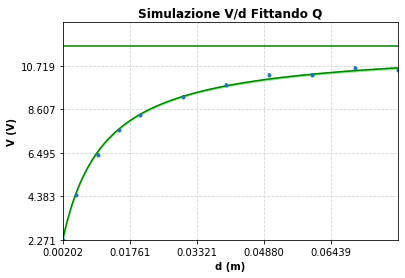

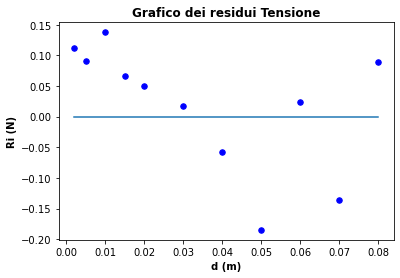

sigma_post_fit
0.11148927193935268
chiquadro
40.19263310360489
chiquadroridotto
4.4658481226227655
sigma_PF_Pesata
[0.04818222 0.09340589 0.13609364 0.16039608 0.17603417 0.19526479
 0.20646505 0.21386144 0.21914458 0.22294844 0.225907  ]
Verr
[0.0228 0.0442 0.0644 0.0759 0.0833 0.0924 0.0977 0.1012 0.1037 0.1055
 0.1069]
Q fittato ed errore
3.187329634472701e-10
5.884269619378686e-12
Q vero
3.19e-10
3.71e-11
Ce fittato ed errore
2.700427016726128e-11
6.152045345683784e-13
Ce vero
[2.86755473e-11]
3.17e-12


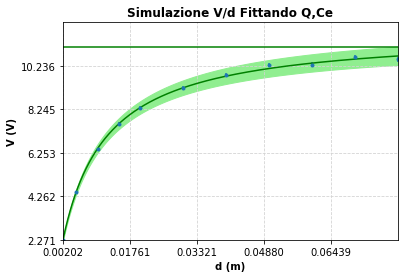

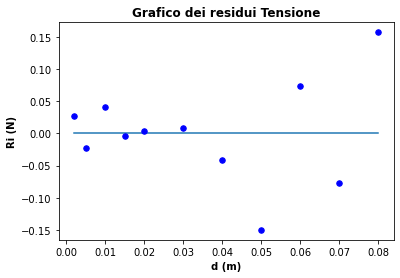

sigma_post_fit
0.08378779280732394
chiquadro
7.653084854087843
chiquadroridotto
0.8503427615653159
sigma_PF_Pesata
[0.0210248  0.0407586  0.05938584 0.06999045 0.07681429 0.08520577
 0.09009311 0.0933206  0.09562595 0.0972858  0.0985768 ]
Verr
[0.0228 0.0442 0.0644 0.0759 0.0833 0.0924 0.0977 0.1012 0.1037 0.1055
 0.1069]


In [26]:
#simulazione PARTE 1 - ESPERIENZA 1

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#Acquisisco Tabella
d = np.array([0.002,0.005,0.01,0.015,0.02,0.03,0.04,0.05,0.06,0.07,0.08])
derr = np.ones(len(d))*0.00005
d = d-np.random.normal(0, derr, len(d))


V = np.array([2.28,4.42,6.44,7.59,8.33,9.24,9.77,10.12,10.37,10.55,10.69])
Verr = V/100
V = V-np.random.normal(0, Verr, len(V))



eps0 = 8.86E-12
A = 0.0254469005
A_err = 1.41E-05
#A = A-np.random.normal(0, A_err, 1)

Ce = 2.70E-11
Ce_err = 3.17E-12
Ce = Ce-np.random.normal(0, Ce_err, 1)

Qarray = np.ones(len(V))*3.19E-10
Qerr = 3.71E-11
Q = Qarray[0]
#Q = Q-np.random.normal(0,Qerr)

b = eps0*A




#SIMULAZIONE V/d LINEARE

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(min(d), max(d), (max(d)-min(d))/5))
ax.set_yticks(np.arange(min(V), max(V), (max(V)-min(V))/5))
plt.xlim(min(d), max(d))
plt.ylim(min(V), max(V))
plt.title("Simulazione V/d",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")

plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')
plt.grid(color='lightgray',linestyle="--",zorder=0)


def objective(x,Q2):
	return Q2/b*x



x = np.linspace(min(d),max(d),1000)
# calculate the output for the range
y = objective(x,Q)

# create a line plot for the mapping function
plt.plot(x, y, '-', color='green')

x_err_min = objective(x,Q-Qerr);
x_err_max = objective(x,Q+Qerr);

plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)
plt.show()

#SIMULAZIONE V/d COMPLETA

fig = plt.figure()
ax = fig.gca()

plt.grid(color='lightgray',linestyle="--",zorder=0)
plt.title("Simulazione V/d Completa",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')



def objective(x,Q2):
	return Q2/(((b/x)+Ce))
 


x = np.linspace(min(d),max(d),1000)
# calculate the output for the range
y = objective(x,Q)


# create a line plot for the mapping function
plt.plot(x, y, '-', color='green')

x = np.linspace(min(d),max(d),1000)

yAsynth = np.ones(1000)*Q/Ce
ymax = yAsynth[0]+yAsynth[0]/10

plt.plot(x, yAsynth, '-', color='green')
ax.set_xticks(np.arange(min(d), max(d), (max(d)-min(d))/5))
ax.set_yticks(np.arange(min(V), ymax, (ymax-min(V))/5))
plt.xlim(min(d), max(d))
plt.ylim(min(V), ymax)
x_err_min = objective(x,Q-Qerr);
x_err_max = objective(x,Q+Qerr);

plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.show()

#SIMULAZIONE V/d Fittata e trovando Q, eps0

from scipy.optimize import curve_fit

def fitobjective(x,Q,eps0):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q,eps0])

popt,pcov = curve_fit(fitobjective, d, V,p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err, eps0_fit_err = err
Q_fit,eps0_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)
print("eps0 fittato ed errore")
print(eps0_fit)
print(eps0_fit_err)
print("eps aria")
print(eps0)


x = np.linspace(min(d),max(d),1000)
y = fitobjective(x, Q_fit, eps0_fit)

yAsynth = np.ones(1000)*Q_fit/Ce
ymax = yAsynth[0]+yAsynth[0]/10

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(min(d), max(d), (max(d)-min(d))/5))
ax.set_yticks(np.arange(min(V), ymax, (ymax-min(V))/5))
plt.xlim(min(d), max(d))
plt.ylim(min(V), ymax)
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x, y, '-', color='green')
plt.plot(x, yAsynth, '-', color='green')

x_err_min = fitobjective(x,Q_fit-Q_fit_err,eps0_fit+eps0_fit_err );# 3 sigma errore
x_err_max = fitobjective(x,Q_fit+Q_fit_err,eps0_fit-eps0_fit_err);# 3 sigma errore
plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V/d Fittando Q,eps0",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')



plt.show()



#GRAFICO RESIDUI

Vf = fitobjective(d,Q_fit,eps0_fit)

Ri = Vf-V

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Tensione",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(x,np.zeros(1000))
plt.scatter(d,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Vf-V)**2)/(len(Vf)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)


  
chiquadro = np.sum((Ri)**2/Verr**2)
print("chiquadro")
print(chiquadro)
chiquadroridotto = chiquadro/(len(Vf)-2)
print("chiquadroridotto")
print(chiquadroridotto)
sigma_PF_Pesata = Verr*(chiquadroridotto)**(1/2)
print("sigma_PF_Pesata")
print(sigma_PF_Pesata)
print("Verr")
print(Verr)

#SIMULAZIONE V/d Fittata e trovando Q

from scipy.optimize import curve_fit

def fitobjective2(x,Q):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q])

popt,pcov = curve_fit(fitobjective2, d, V,p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err = err
Q_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)
print("Q vero")
print(Q)
print(Qerr)



x = np.linspace(min(d),max(d),1000)
y = fitobjective2(x, Q_fit)

yAsynth = np.ones(1000)*Q_fit/Ce
ymax = yAsynth[0]+yAsynth[0]/10

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(min(d), max(d), (max(d)-min(d))/5))
ax.set_yticks(np.arange(min(V), ymax, (ymax-min(V))/5))
plt.xlim(min(d), max(d))
plt.ylim(min(V), ymax)
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x, y, '-', color='green')
plt.plot(x, yAsynth, '-', color='green')

x_err_min = fitobjective2(x,Q_fit-Q_fit_err );# 3 sigma errore
x_err_max = fitobjective2(x,Q_fit+Q_fit_err);# 3 sigma errore
plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V/d Fittando Q",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')



plt.show()



#GRAFICO RESIDUI

Vf = fitobjective2(d,Q_fit)

Ri = Vf-V

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Tensione",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(x,np.zeros(1000))
plt.scatter(d,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Vf-V)**2)/(len(Vf)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)


  
chiquadro = np.sum((Ri)**2/Verr**2)
print("chiquadro")
print(chiquadro)
chiquadroridotto = chiquadro/(len(Vf)-2)
print("chiquadroridotto")
print(chiquadroridotto)
sigma_PF_Pesata = Verr*(chiquadroridotto)**(1/2)
print("sigma_PF_Pesata")
print(sigma_PF_Pesata)
print("Verr")
print(Verr)

#SIMULAZIONE V/d Fittata e trovando Q,Ce

from scipy.optimize import curve_fit

def fitobjective3(x,Q,Ce):
	return Q/((eps0*A/x)+(Ce))
guess = np.array([Q,Ce[0]])

popt,pcov = curve_fit(fitobjective3, d, V,p0=guess)
err = np.sqrt(np.diag(pcov))
Q_fit_err,Ce_fit_err = err
Q_fit,Ce_fit = popt
print("Q fittato ed errore")
print(Q_fit)
print(Q_fit_err)
print("Q vero")
print(Q)
print(Qerr)
print("Ce fittato ed errore")
print(Ce_fit)
print(Ce_fit_err)
print("Ce vero")
print(Ce)
print(Ce_err)



x = np.linspace(min(d),max(d),1000)
y = fitobjective3(x, Q_fit, Ce_fit)

yAsynth = np.ones(1000)*Q_fit/Ce
ymax = yAsynth[0]+yAsynth[0]/10

fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(min(d), max(d), (max(d)-min(d))/5))
ax.set_yticks(np.arange(min(V), ymax, (ymax-min(V))/5))
plt.xlim(min(d), max(d))
plt.ylim(min(V), ymax)
plt.grid(color='lightgray',linestyle="--",zorder=0)

plt.plot(x, y, '-', color='green')
plt.plot(x, yAsynth, '-', color='green')

x_err_min = fitobjective3(x,Q_fit-Q_fit_err,Ce_fit+Ce_fit_err );# 3 sigma errore
x_err_max = fitobjective3(x,Q_fit+Q_fit_err,Ce_fit-Ce_fit_err);# 3 sigma errore
plt.fill_between(x,x_err_min,x_err_max, color="lightgreen",zorder=1)

plt.title("Simulazione V/d Fittando Q,Ce",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("V (V)",fontweight="bold")
plt.errorbar(d, V, xerr=derr, yerr=Verr, fmt='.')



plt.show()



#GRAFICO RESIDUI

Vf = fitobjective3(d,Q_fit, Ce_fit)

Ri = Vf-V

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Tensione",fontweight="bold")
plt.xlabel("d (m)",fontweight="bold")
plt.ylabel("Ri (N)",fontweight="bold")
plt.plot(x,np.zeros(1000))
plt.scatter(d,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Vf-V)**2)/(len(Vf)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)


  
chiquadro = np.sum((Ri)**2/Verr**2)
print("chiquadro")
print(chiquadro)
chiquadroridotto = chiquadro/(len(Vf)-2)
print("chiquadroridotto")
print(chiquadroridotto)
sigma_PF_Pesata = Verr*(chiquadroridotto)**(1/2)
print("sigma_PF_Pesata")
print(sigma_PF_Pesata)
print("Verr")
print(Verr)

# New Section